## IMDB 영화 리뷰 감성 분석

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas  as pd

### 데이터 불러오기

In [2]:
### IMDB 데이터 다운로드
(X_train, y_train),(X_test, y_test) = tf.keras.datasets.imdb.load_data(num_words = 10000, seed = 0)

17464789/17464789 [==============================] - 0s 0us/step


In [3]:
### 다운로드 받은 데이터 확인
# 첫번째 학습용 데이터 확인
print(f'첫번째 X_train : {X_train[0]}')
print('-'*80)
print(f'첫번째 y_train : {y_train[0]}')
print('-'*80)
print(X_train.shape)

첫번째 X_train : [1, 4078, 2, 9, 448, 725, 4, 2, 241, 2, 241, 38, 111, 2, 500, 40, 91, 374, 500, 679, 102, 13, 62, 135, 4, 2159, 92, 7241, 83, 6, 275, 3449, 66, 73, 5, 15, 271, 18, 14, 31, 99, 2149, 10, 10, 225, 6, 184, 196, 8127, 63, 2568, 5, 732, 4, 863, 18, 4, 65, 5, 4, 1397, 1111, 23, 63, 6, 564, 4892, 2, 5, 27, 476, 577, 2, 2, 2, 5, 492, 2, 2, 2, 216, 8, 847, 83, 4, 9370, 92, 168, 32, 99, 2575, 5, 515, 195, 481, 2017, 9, 348, 44, 4, 2, 23, 4, 1111, 8, 789, 2, 280, 4, 2, 517, 2, 10, 10, 1958, 5, 1364, 183, 380, 8, 140, 2, 5, 263, 6308, 140, 23, 6, 1973, 3318, 187, 4, 3450, 8, 1974, 618, 51, 9, 1448, 23, 14, 2, 1111, 19, 94, 680, 5818, 21, 11, 882, 25, 80, 24, 1414, 19, 803, 170, 23, 17, 2, 5, 2447, 2953, 79, 1376, 11, 8, 2, 4, 114, 60, 53, 51, 16, 66, 3742, 12, 83, 4, 5513, 7, 78, 212, 26, 94, 2, 1815, 2611, 46, 7, 4, 5797, 388, 63, 43, 2266, 5342, 2, 33, 94, 2099, 3002, 366, 45, 1852, 76, 303, 45, 31, 155, 269, 8, 216, 56, 5, 984, 142, 1393, 21, 160, 155, 399, 12, 4521, 5, 19, 2, 238

In [ ]:
X_train

In [4]:
### 단어 사전 확인하기

# 단어 사전 가져오기
vocab = tf.keras.datasets.imdb.get_word_index()

# 결과 확인
print(vocab)
print(len(vocab))
#print(vocab)

1641221/1641221 [==============================] - 0s 0us/step
{'fawn': 34701, 'tsukino': 52006, 'nunnery': 52007, 'sonja': 16816, 'vani': 63951, 'woods': 1408, 'spiders': 16115, 'hanging': 2345, 'woody': 2289, 'trawling': 52008, "hold's": 52009, 'comically': 11307, 'localized': 40830, 'disobeying': 30568, "'royale": 52010, "harpo's": 40831, 'canet': 52011, 'aileen': 19313, 'acurately': 52012, "diplomat's": 52013, 'rickman': 25242, 'arranged': 6746, 'rumbustious': 52014, 'familiarness': 52015, "spider'": 52016, 'hahahah': 68804, "wood'": 52017, 'transvestism': 40833, "hangin'": 34702, 'bringing': 2338, 'seamier': 40834, 'wooded': 34703, 'bravora': 52018, 'grueling': 16817, 'wooden': 1636, 'wednesday': 16818, "'prix": 52019, 'altagracia': 34704, 'circuitry': 52020, 'crotch': 11585, 'busybody': 57766, "tart'n'tangy": 52021, 'burgade': 14129, 'thrace': 52023, "tom's": 11038, 'snuggles': 52025, 'francesco': 29114, 'complainers': 52027, 'templarios': 52125, '272': 40835, '273': 52028, 'zani

### 보충

In [ ]:
### 보충 : tf.keras.preprocessing.text.Tokenizer()

# 필요한 라이브러리 임폴트
import pandas as pd

# 파일 경로 설정
file_path = '/content/drive/MyDrive/KDT/딥러닝/자연어처리/imdb.csv'

# DataFrame 생성
df = pd.read_csv(file_path)

# 결과 확인하기
print(df)

                                                  review  sentiment
0      stuff going moment mj started listening music ...          1
1      classic war worlds timothy hines entertaining ...          1
2      film starts manager nicholas bell giving welco...          0
3      must assumed praised film greatest filmed oper...          0
4      superbly trashy wondrously unpretentious explo...          1
...                                                  ...        ...
24995  seems like consideration gone imdb reviews fil...          0
24996  believe made film completely unnecessary first...          0
24997  guy loser get girls needs build picked stronge...          0
24998  minute documentary bu uel made early one spain...          0
24999  saw movie child broke heart story unfinished e...          1

[25000 rows x 2 columns]


In [ ]:
# Tokenizer 모델 호출, 모델 생성
tokenizer = tf.keras.preprocessing.text.Tokenizer()

# model.fit_on_texts(texts) --> 리뷰 --> 토큰화 + 단어 사전
texts = df.loc[:, 'review'].values
tokenizer.fit_on_texts(texts)

# 단어 사전 추출 --> model.word_index
vocab = tokenizer.word_index
print(len(vocab))
print('-'*80)
print(vocab)

# 정수 인코딩 : 리뷰의 각 단어 --> 단어 사전의 인덱스로 교체 --> texts_to_sequences(texts)
encodings = tokenizer.texts_to_sequences(texts)
print(f'정수 인코딩의 결과 : \n{encodings}')

74061
--------------------------------------------------------------------------------
{'movie': 1, 'film': 2, 'one': 3, 'like': 4, 'good': 5, 'time': 6, 'even': 7, 'would': 8, 'story': 9, 'really': 10, 'see': 11, 'well': 12, 'much': 13, 'get': 14, 'bad': 15, 'people': 16, 'also': 17, 'first': 18, 'great': 19, 'made': 20, 'way': 21, 'make': 22, 'could': 23, 'movies': 24, 'think': 25, 'characters': 26, 'character': 27, 'watch': 28, 'two': 29, 'films': 30, 'seen': 31, 'many': 32, 'life': 33, 'plot': 34, 'acting': 35, 'never': 36, 'love': 37, 'little': 38, 'best': 39, 'show': 40, 'know': 41, 'ever': 42, 'man': 43, 'better': 44, 'end': 45, 'still': 46, 'say': 47, 'scene': 48, 'scenes': 49, 'go': 50, 'something': 51, 'back': 52, 'real': 53, 'watching': 54, 'though': 55, 'thing': 56, 'old': 57, 'years': 58, 'actors': 59, 'director': 60, 'work': 61, 'another': 62, 'new': 63, 'nothing': 64, 'funny': 65, 'actually': 66, 'makes': 67, 'look': 68, 'find': 69, 'going': 70, 'part': 71, 'lot': 72, 'e

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
print(f' 앞쪽의 5개 리뷰에 대한 정수 인코딩의 결과 : \n{encodings[:5]}')

 앞쪽의 5개 리뷰에 대한 정수 인코딩의 결과 : 
[[404, 70, 419, 8813, 505, 2457, 115, 54, 872, 515, 178, 18683, 178, 11240, 165, 79, 14, 661, 2458, 117, 92, 10, 498, 4074, 165, 22, 210, 580, 2334, 1194, 11240, 71, 4826, 71, 634, 2, 253, 70, 11, 302, 1663, 485, 1144, 3266, 8813, 411, 792, 3342, 17, 440, 599, 1500, 15, 4424, 1851, 997, 146, 342, 1442, 742, 2425, 4, 8813, 418, 70, 636, 69, 237, 94, 540, 8813, 26052, 26053, 120, 1, 8813, 323, 8, 47, 20, 323, 167, 10, 207, 632, 634, 2, 116, 291, 382, 121, 15532, 3315, 1501, 573, 733, 10011, 922, 11576, 821, 1239, 1408, 360, 8813, 221, 15, 575, 8813, 22221, 2274, 13423, 733, 10011, 27, 28603, 340, 16, 41, 18684, 1500, 388, 11241, 165, 3962, 8813, 115, 626, 498, 80, 4, 8813, 1430, 380, 2163, 114, 1919, 2504, 573, 17, 60, 100, 4875, 5100, 260, 1268, 26054, 15, 573, 492, 743, 636, 630, 3, 394, 164, 445, 114, 614, 3267, 1160, 683, 48, 1175, 224, 1, 16, 4, 8813, 3, 506, 62, 25, 16, 639, 133, 231, 95, 7426, 599, 3439, 8813, 37245, 1864, 1, 128, 342, 1442, 247, 3, 86

In [ ]:
### 정수 인코딩의 결과 해석

# 리뷰의 첫번째 문장
print(texts[0])
print('-'*80)

# 리뷰의 첫번째 문장 --> 단어로 분할 --> split()
word_list = texts[0].split()
print(f'첫번째 리뷰를 구성하고 있는 단어  : \n{word_list}')

stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate working

In [ ]:
# for문 + append()
encoding = []
for word in word_list:
    idx = vocab[word]
    encoding.append(idx)

# 결과 확인하기
print(f'첫번째 리뷰에 대한 정수 인코딩의 결과 : \n{encoding}')

첫번째 리뷰에 대한 정수 인코딩의 결과 : 
[404, 70, 419, 8813, 505, 2457, 115, 54, 872, 515, 178, 18683, 178, 11240, 165, 79, 14, 661, 2458, 117, 92, 10, 498, 4074, 165, 22, 210, 580, 2334, 1194, 11240, 71, 4826, 71, 634, 2, 253, 70, 11, 302, 1663, 485, 1144, 3266, 8813, 411, 792, 3342, 17, 440, 599, 1500, 15, 4424, 1851, 997, 146, 342, 1442, 742, 2425, 4, 8813, 418, 70, 636, 69, 237, 94, 540, 8813, 26052, 26053, 120, 1, 8813, 323, 8, 47, 20, 323, 167, 10, 207, 632, 634, 2, 116, 291, 382, 121, 15532, 3315, 1501, 573, 733, 10011, 922, 11576, 821, 1239, 1408, 360, 8813, 221, 15, 575, 8813, 22221, 2274, 13423, 733, 10011, 27, 28603, 340, 16, 41, 18684, 1500, 388, 11241, 165, 3962, 8813, 115, 626, 498, 80, 4, 8813, 1430, 380, 2163, 114, 1919, 2504, 573, 17, 60, 100, 4875, 5100, 260, 1268, 26054, 15, 573, 492, 743, 636, 630, 3, 394, 164, 445, 114, 614, 3267, 1160, 683, 48, 1175, 224, 1, 16, 4, 8813, 3, 506, 62, 25, 16, 639, 133, 231, 95, 7426, 599, 3439, 8813, 37245, 1864, 1, 128, 342, 1442, 247, 3, 864, 16

### 데이터 분석

[417, 217, 138, 371, 309, 234, 134, 222, 369, 239, 132, 40, 141, 140, 242, 76, 148, 149, 160, 280, 120, 75, 635, 300, 241, 90, 66, 217, 181, 105, 161, 234, 211, 75, 263, 229, 168, 296, 184, 223, 395, 570, 413, 112, 442, 310, 198, 49, 244, 132, 135, 363, 172, 293, 346, 143, 87, 107, 532, 239, 149, 215, 72, 120, 106, 121, 339, 299, 313, 183, 116, 541, 656, 65, 383, 145, 54, 429, 206, 91, 155, 52, 155, 68, 400, 203, 116, 122, 785, 121, 166, 142, 120, 183, 340, 390, 809, 257, 334, 130, 213, 435, 157, 536, 78, 137, 264, 80, 958, 151, 127, 580, 61, 180, 172, 230, 119, 124, 226, 147, 127, 130, 140, 59, 249, 88, 159, 155, 123, 61, 65, 134, 209, 156, 130, 639, 85, 342, 118, 140, 73, 385, 135, 484, 165, 295, 207, 158, 118, 207, 442, 167, 473, 165, 161, 402, 799, 178, 131, 166, 265, 170, 219, 438, 512, 454, 729, 167, 152, 165, 198, 170, 244, 453, 187, 164, 131, 123, 120, 158, 189, 86, 161, 138, 87, 296, 127, 45, 204, 527, 481, 184, 127, 233, 97, 128, 297, 123, 107, 146, 66, 274, 80, 83, 56, 1010,

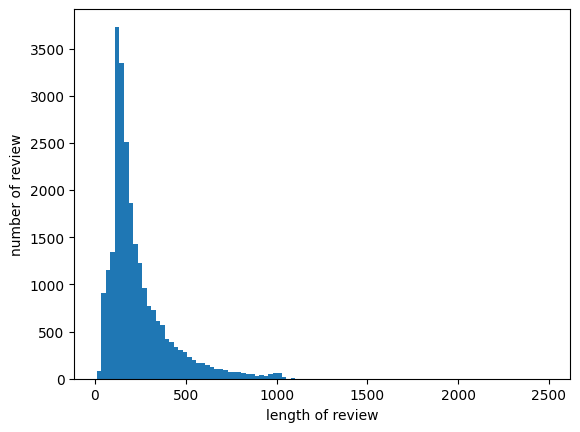

--------------------------------------------------------------------------------
0        417
1        217
2        138
3        371
4        309
        ... 
24995    194
24996    100
24997    303
24998    414
24999    211
Length: 25000, dtype: int64
--------------------------------------------------------------------------------
count    25000.000000
mean       238.713640
std        176.497204
min         11.000000
50%        178.000000
75%        291.000000
90%        467.000000
95%        610.000000
max       2494.000000
dtype: float64


In [5]:
import pandas as pd

### 학습용 리뷰 데이터의 길이 분석

list_len = []
for review in X_train:
  list_len.append(len(review))

print(list_len)
print('-'*80)
print(len(list_len))
print('-'*80)


# 학습용 리뷰 데이터의 길이 분포 --> 시각화 --> matplotlib.pylot.plt()사용
plt.hist(x = list_len, bins = 100)
plt.xlabel('length of review')
plt.ylabel('number of review')
plt.show()

print('-'*80)

# 학습용 리뷰 데이터의 길이 --> 기본 통계량 추출
s_len = pd.Series(data = list_len)
print(s_len)
print('-'*80)
print(s_len.describe(percentiles = [0.75, 0.90, 0.95]))

In [6]:
### 정답 데이터의 분포

# np.unique(ar, return_counts)
counts_train = np.unique(ar=y_train, return_counts=True)
counts_test = np.unique(ar=y_test, return_counts=True)

# 결과 확인하기
print(f'학습용 정답 데이터의 분포 : \n{counts_train}')
print('-'*80)
print(f'평가용 정답 데이터의 분포 : \n{counts_test}')

학습용 정답 데이터의 분포 : 
(array([0, 1]), array([12500, 12500]))
--------------------------------------------------------------------------------
평가용 정답 데이터의 분포 : 
(array([0, 1]), array([12500, 12500]))


### 데이터 전처리

In [7]:
'''
tf.keras.utils.pad_sequences(data, maxlen)
'''
max_len = 470

X_train = tf.keras.utils.pad_sequences(sequences = X_train, maxlen = max_len)
X_test = tf.keras.utils.pad_sequences(sequences = X_test, maxlen = max_len)

print(f'학습용 데이터의 길이를 일정하게 처리한 결과 : {X_train.shape}')
print('-'*80)
print(f'평가용 데이터의 길이를 일정하게 처리한 결과 : {X_test.shape}')
print('-'*80)
print(f'첫번째 학습용 데이터 확인 : \n{X_train[0]}')

학습용 데이터의 길이를 일정하게 처리한 결과 : (25000, 470)
--------------------------------------------------------------------------------
평가용 데이터의 길이를 일정하게 처리한 결과 : (25000, 470)
--------------------------------------------------------------------------------
첫번째 학습용 데이터 확인 : 
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    1 4078    2
    9  448  725    4    2  241    2  241   38  111    2  500   40   91
  374  500  679  102   13   62  135    4 2159   92 7241   83    6  275
 3449   66   73    5   15  271   18   14   31   99 2149   10   10  225
    6  184  196 8127   63 2568    5  732    4  863   18    4   65    5
    4 1397 1111   23   63    6  564 4892    2    5   27  476  577    2
    2    2    5  492    2    2    2  216    8  847   83    4 9370   92
  168   32   99 2575    5  515

### RNN 모델을 이용한 텍스트 감성 분석

In [8]:
### 랜덤 시드 설정

tf.random.set_seed(0)
initializer1 = tf.keras.initializers.GlorotUniform(seed = 0)
initializer2 = tf.keras.initializers.Orthogonal(seed=0)

#### 임베딩 레이어

In [9]:
vocab_size = 10000
embedding_size = 32

# 임베딩 레이어(모델, 클래스 함수) 생성
embedding_layer = tf.keras.layers.Embedding(input_dim = vocab_size, output_dim = embedding_size, input_length = max_len,
                                            embeddings_initializer = initializer1)

# 입력 데이터 생성하기
input = X_train[:, :]

# 입력의 결과물 확인
output_embedding = embedding_layer(input)
print(f'학습용 리뷰 전체에 대한 임베딩 모양 : {output_embedding.shape}')
print('-'*80)
print(f'학습용 리뷰 전체에 대한 임베딩 확인 : \n{output_embedding}')

학습용 리뷰 전체에 대한 임베딩 모양 : (25000, 470, 32)
--------------------------------------------------------------------------------
학습용 리뷰 전체에 대한 임베딩 확인 : 
[[[-1.41346958e-02  1.00762788e-02  1.46765802e-02 ...  8.86849873e-03
   -1.61446705e-02 -4.40131128e-03]
  [-1.41346958e-02  1.00762788e-02  1.46765802e-02 ...  8.86849873e-03
   -1.61446705e-02 -4.40131128e-03]
  [-1.41346958e-02  1.00762788e-02  1.46765802e-02 ...  8.86849873e-03
   -1.61446705e-02 -4.40131128e-03]
  ...
  [ 5.46274520e-03  2.29977462e-02  1.59216132e-02 ...  2.92080455e-03
   -1.75906364e-02 -6.05108961e-03]
  [-2.10267492e-02  1.60439126e-03 -2.20730472e-02 ...  1.30653996e-02
   -1.31613975e-02 -1.79071799e-02]
  [ 2.55520642e-03 -4.29179147e-03 -2.42203847e-03 ... -9.30593442e-03
    2.10226979e-02 -1.39840003e-02]]

 [[-1.41346958e-02  1.00762788e-02  1.46765802e-02 ...  8.86849873e-03
   -1.61446705e-02 -4.40131128e-03]
  [-1.41346958e-02  1.00762788e-02  1.46765802e-02 ...  8.86849873e-03
   -1.61446705e-02 -4.40131

#### RNN 레이어

In [10]:
# RNN 생성 함수 호출, 모델 생성(객체 생성) - 활성화 함수 적용

rnn_layer = tf.keras.layers.SimpleRNN(units=16, kernel_initializer = initializer1,
                                      recurrent_initializer = initializer2)

# 입력의 결과물 확인
input = output_embedding[:, :, :]
output_rnn = rnn_layer(input)
print(f'RNN 레이어의 결과물(리뷰 임베딩)의 모양 : {output_rnn.shape}')
print('-'*80)
print(f'RNN 레이어의 결과물 확인 : \n{output_rnn}')
print('-'*80)

print(f'rnn 레이어의 결과 값(최대값) 확인 : \n{np.max(output_rnn)}')
print('-'*80)
print(f'rnn 레이어의 결과 값(최소값) 확인 : \n{np.min(output_rnn)}')

RNN 레이어의 결과물(리뷰 임베딩)의 모양 : (25000, 16)
--------------------------------------------------------------------------------
RNN 레이어의 결과물 확인 : 
[[ 1.1153968e-01 -1.4295141e-01 -3.8502216e-02 ... -7.5004287e-03
  -1.4936188e-01 -4.8630938e-02]
 [ 9.8066382e-02 -2.2837957e-02 -1.3572417e-01 ... -1.1837555e-01
   8.8786192e-02 -1.4779434e-01]
 [ 7.8627877e-02 -1.2445106e-01 -1.3881652e-01 ...  9.2387581e-03
   4.9449485e-02  2.2616478e-02]
 ...
 [-4.2872719e-02 -4.5798365e-02 -1.8941592e-01 ...  4.7511458e-02
  -9.5070839e-02 -2.6141530e-01]
 [ 2.0391308e-05  5.1272339e-03 -6.2305494e-03 ... -3.8790718e-02
   1.3460368e-01  2.4781594e-01]
 [ 5.5136543e-02 -1.1331706e-01  3.0775366e-02 ...  2.5435326e-01
   1.1908078e-01 -1.3274285e-02]]
--------------------------------------------------------------------------------
rnn 레이어의 결과 값(최대값) 확인 : 
0.400465190410614
--------------------------------------------------------------------------------
rnn 레이어의 결과 값(최소값) 확인 : 
-0.4277125597000122


In [ ]:
# RNN 생성 함수 호출, 모델 생성(객체 생성) - 활성화 함수 적용(X)

rnn_layer = tf.keras.layers.SimpleRNN(units=16, activation = None, kernel_initializer = initializer1,
                                      recurrent_initializer = initializer2)

# 입력의 결과물 확인
input = output_embedding[:, :, :]
output_rnn = rnn_layer(input)
print(f'RNN 레이어의 결과물(리뷰 임베딩)의 모양 : {output_rnn.shape}')
print('-'*80)
print(f'RNN 레이어의 결과물 확인 : \n{output_rnn}')
print('-'*80)

print(f'rnn 레이어의 결과 값(최대값) 확인 : \n{np.max(output_rnn)}')
print('-'*80)
print(f'rnn 레이어의 결과 값(최소값) 확인 : \n{np.min(output_rnn)}')

RNN 레이어의 결과물(리뷰 임베딩)의 모양 : (25000, 16)
--------------------------------------------------------------------------------
RNN 레이어의 결과물 확인 : 
[[ 0.27847192 -0.587646   -0.2414986  ... -0.26158068 -0.14166716
   0.05001464]
 [ 0.2616759   0.09520553 -0.18859786 ... -0.22976139 -0.00101363
  -0.3362541 ]
 [ 0.19239677 -0.13163364 -0.2667354  ...  0.01096035  0.11529501
  -0.06825399]
 ...
 [ 0.05543333 -0.3106755  -0.08975152 ...  0.02779534 -0.06527068
  -0.53436726]
 [-0.1529309  -0.09003854  0.20302552 ... -0.46164355 -0.1523672
   0.80564094]
 [ 0.08041272 -0.23631242  0.05981044 ...  0.39699918  0.10038671
  -0.04067095]]
--------------------------------------------------------------------------------
rnn 레이어의 결과 값(최대값) 확인 : 
1.3385930061340332
--------------------------------------------------------------------------------
rnn 레이어의 결과 값(최소값) 확인 : 
-1.5046156644821167


#### Dense 레이어

In [11]:
# Dense 모델 생성 함수 호출, 모델 생성(객체 생성)
dense_layer = tf.keras.layers.Dense(units = 1, activation = 'sigmoid', kernel_initializer = initializer1)

input = output_rnn[:, :]
output_dense = dense_layer(input)
print(f'dense 레이어 결과 확인(모양) : {output_dense.shape}')
print('-'*80)
print(f'dense 레이어 결과 값 확인 : \n{output_dense}')

dense 레이어 결과 확인(모양) : (25000, 1)
--------------------------------------------------------------------------------
dense 레이어 결과 값 확인 : 
[[0.4780664 ]
 [0.43277103]
 [0.4737723 ]
 ...
 [0.43090922]
 [0.50076824]
 [0.475377  ]]


In [12]:
# 입력 결과물 --> 정답 레이블로 변환(0 또는 1)
labels = []
for output in output_dense:
  if output >= 0.5:
    labels.append(1)
  else:
    labels.append(0)

print(labels)
print('-'*80)
print(y_train)

[0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 

#### RNN 학습 모델 생성

In [13]:
#학습 모델 구성하기 1
'''
모델 구성 순서
1. Sequential()를 이용하여 모델 껍질(컨데이너) 생성하기
2. Embedding layer 추가하기
3. SimpleRNN layer 추가하기
4. Dense layer 추가하가
'''
# 기본 설정
vocab_size = 10000
embedding_size = 32
max_lenght = 470

# 텅빈 모델 객체 생성
model1 = tf.keras.Sequential()

# model.add()
model1.add(tf.keras.layers.Embedding(input_dim = vocab_size, output_dim = embedding_size, input_length = max_lenght,
                                            embeddings_initializer = initializer1))
model1.add(tf.keras.layers.SimpleRNN(units=16, kernel_initializer = initializer1,
                                      recurrent_initializer = initializer2))
model1.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid', kernel_initializer = initializer1))

In [14]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 470, 32)           320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 16)                784       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 320801 (1.22 MB)
Trainable params: 320801 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
### 랜덤 시드 설정

tf.random.set_seed(0)
initializer1 = tf.keras.initializers.GlorotUniform(seed = 0)
initializer2 = tf.keras.initializers.Orthogonal(seed=0)

In [26]:
#학습 모델 구성하기 2
'''
모델 구성 순서
1. Sequential()를 이용하여 모델 껍질(컨데이너) 생성하기
2. Embedding layer 추가하기
3. SimpleRNN layer 추가하기
4. Dense layer 추가하가
'''
# 기본 설정
vocab_size = 10000
embedding_size = 32
max_lenght = 470

# 텅빈 모델 객체 생성
model2 = tf.keras.Sequential()

# model.add()
model2.add(tf.keras.layers.Embedding(input_dim = vocab_size, output_dim = embedding_size, input_length = max_lenght,
                                            embeddings_initializer = initializer1))
model2.add(tf.keras.layers.SimpleRNN(units = 32, kernel_initializer = initializer1,
                                      recurrent_initializer = initializer2))
model2.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid', kernel_initializer = initializer1))

In [27]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 470, 32)           320000    
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 322113 (1.23 MB)
Trainable params: 322113 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
### 랜덤 시드 설정

tf.random.set_seed(0)
initializer1 = tf.keras.initializers.GlorotUniform(seed = 0)
initializer2 = tf.keras.initializers.Orthogonal(seed=0)

In [34]:
#학습 모델 구성하기 3
'''
모델 구성 순서
1. Sequential()를 이용하여 모델 껍질(컨데이너) 생성하기
2. Embedding layer 추가하기
3. SimpleRNN layer 추가하기
4. Dense layer 추가하가
'''
# 기본 설정
vocab_size = 10000
embedding_size = 64
max_lenght = 470

# 텅빈 모델 객체 생성
model3 = tf.keras.Sequential()

# model.add()
model3.add(tf.keras.layers.Embedding(input_dim = vocab_size, output_dim = embedding_size, input_length = max_lenght,
                                            embeddings_initializer = initializer1))
model3.add(tf.keras.layers.SimpleRNN(units = 16, kernel_initializer = initializer1,
                                      recurrent_initializer = initializer2))
model3.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid', kernel_initializer = initializer1))

In [35]:
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 470, 64)           640000    
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 16)                1296      
                                                                 
 dense_6 (Dense)             (None, 1)                 17        
                                                                 
Total params: 641313 (2.45 MB)
Trainable params: 641313 (2.45 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
### 랜덤 시드 설정

tf.random.set_seed(0)
initializer1 = tf.keras.initializers.GlorotUniform(seed = 0)
initializer2 = tf.keras.initializers.Orthogonal(seed=0)

In [46]:
#학습 모델 구성하기 4
'''
모델 구성 순서
1. Sequential()를 이용하여 모델 껍질(컨데이너) 생성하기
2. Embedding layer 추가하기
3. SimpleRNN layer 추가하기
4. Dense layer 추가하가
'''
# 기본 설정
vocab_size = 10000
embedding_size = 64
max_lenght = 470

# 텅빈 모델 객체 생성
model4 = tf.keras.Sequential()

# model.add()
model4.add(tf.keras.layers.Embedding(input_dim = vocab_size, output_dim = embedding_size, input_length = max_lenght,
                                            embeddings_initializer = initializer1))
model4.add(tf.keras.layers.SimpleRNN(units = 32, kernel_initializer = initializer1,
                                      recurrent_initializer = initializer2))
model4.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid', kernel_initializer = initializer1))

In [51]:
### 랜덤 시드 설정

tf.random.set_seed(0)
initializer1 = tf.keras.initializers.GlorotUniform(seed = 0)
initializer2 = tf.keras.initializers.Orthogonal(seed=0)

In [52]:
#학습 모델 구성하기 5
'''
모델 구성 순서
1. Sequential()를 이용하여 모델 껍질(컨데이너) 생성하기
2. Embedding layer 추가하기
3. SimpleRNN layer 추가하기
4. Dense layer 추가하가
'''
# 기본 설정
vocab_size = 10000
embedding_size = 32
max_lenght = 470

# 텅빈 모델 객체 생성
model5 = tf.keras.Sequential()

# model.add()
model5.add(tf.keras.layers.Embedding(input_dim = vocab_size, output_dim = embedding_size, input_length = max_lenght,
                                            embeddings_initializer = initializer1))

model5.add(tf.keras.layers.SimpleRNN(units = 16, return_sequences = True, kernel_initializer = initializer1,
                                      recurrent_initializer = initializer2))
model5.add(tf.keras.layers.SimpleRNN(units = 16, kernel_initializer = initializer1,
                                      recurrent_initializer = initializer2))

model5.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid', kernel_initializer = initializer1))

In [53]:
model5.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 470, 32)           320000    
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 470, 16)           784       
                                                                 
 simple_rnn_12 (SimpleRNN)   (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 321329 (1.23 MB)
Trainable params: 321329 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
'''
# 컴파일(compile)
1. 학습(가중치 업데이트)에 대한 환경을 설정하여 모델을 완성하기
2. 손실 함수 설정 --> loss --> 감성 분석은 이진 분류, binary_crossentropy 사용
3. 최적화 함수 설정 --> optimizer --> adam 사용
4. 모델 예측에 대한 성능 평가 기준 설정 -- > metrics --> ['accuracy'] 사용
'''
#model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#model3.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#model4.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model5.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [17]:
### SimpleRNN(units = 16) 모델
model1.fit(
    x = X_train,
    y = y_train,
    #batch_size = 200,
    epochs = 5,
    validation_split = 0.2
)

Epoch 1/5
625/625 [==============================] - 81s 127ms/step - loss: 0.2100 - accuracy: 0.9151 - val_loss: 1.0879 - val_accuracy: 0.5794
Epoch 2/5
625/625 [==============================] - 87s 140ms/step - loss: 0.1197 - accuracy: 0.9592 - val_loss: 1.2431 - val_accuracy: 0.5862
Epoch 3/5
625/625 [==============================] - 78s 124ms/step - loss: 0.0355 - accuracy: 0.9929 - val_loss: 1.4608 - val_accuracy: 0.5784
Epoch 4/5
625/625 [==============================] - 79s 126ms/step - loss: 0.0103 - accuracy: 0.9992 - val_loss: 1.6237 - val_accuracy: 0.5718
Epoch 5/5
625/625 [==============================] - 77s 124ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 1.7443 - val_accuracy: 0.5710


In [31]:
### SimpleRNN(units = 32) 모델
model2.fit(x = X_train, y = y_train, epochs = 5, validation_split = 0.2)

Epoch 1/5
625/625 [==============================] - 69s 109ms/step - loss: 0.5222 - accuracy: 0.7273 - val_loss: 0.3701 - val_accuracy: 0.8404
Epoch 2/5
625/625 [==============================] - 75s 119ms/step - loss: 0.3531 - accuracy: 0.8493 - val_loss: 0.9588 - val_accuracy: 0.6700
Epoch 3/5
625/625 [==============================] - 68s 110ms/step - loss: 0.2330 - accuracy: 0.9107 - val_loss: 0.4798 - val_accuracy: 0.7870
Epoch 4/5
625/625 [==============================] - 66s 105ms/step - loss: 0.0994 - accuracy: 0.9675 - val_loss: 0.5322 - val_accuracy: 0.8070
Epoch 5/5
625/625 [==============================] - 70s 111ms/step - loss: 0.0404 - accuracy: 0.9883 - val_loss: 0.6834 - val_accuracy: 0.7886


In [37]:
### SimpleRNN(units = 16), embedding_size = 64 모델
model3.fit(x = X_train, y = y_train, epochs = 5, validation_split = 0.2)

Epoch 1/5
625/625 [==============================] - 85s 135ms/step - loss: 0.6406 - accuracy: 0.6184 - val_loss: 0.5884 - val_accuracy: 0.6822
Epoch 2/5
625/625 [==============================] - 73s 116ms/step - loss: 0.4576 - accuracy: 0.7919 - val_loss: 0.5824 - val_accuracy: 0.6982
Epoch 3/5
625/625 [==============================] - 77s 123ms/step - loss: 0.2579 - accuracy: 0.9087 - val_loss: 0.6721 - val_accuracy: 0.6810
Epoch 4/5
625/625 [==============================] - 75s 119ms/step - loss: 0.0932 - accuracy: 0.9770 - val_loss: 0.8362 - val_accuracy: 0.6738
Epoch 5/5
625/625 [==============================] - 73s 117ms/step - loss: 0.0260 - accuracy: 0.9967 - val_loss: 0.9701 - val_accuracy: 0.6776


In [48]:
### SimpleRNN(units = 32), embedding_size = 64 모델
model4.fit(x = X_train, y = y_train, epochs = 5, validation_split = 0.2)

Epoch 1/5
625/625 [==============================] - 73s 114ms/step - loss: 0.5204 - accuracy: 0.7329 - val_loss: 0.5194 - val_accuracy: 0.7402
Epoch 2/5
625/625 [==============================] - 74s 119ms/step - loss: 0.3172 - accuracy: 0.8681 - val_loss: 0.3832 - val_accuracy: 0.8464
Epoch 3/5
625/625 [==============================] - 73s 117ms/step - loss: 0.1521 - accuracy: 0.9450 - val_loss: 0.4478 - val_accuracy: 0.8300
Epoch 4/5
625/625 [==============================] - 71s 113ms/step - loss: 0.0567 - accuracy: 0.9825 - val_loss: 0.6426 - val_accuracy: 0.7806
Epoch 5/5
625/625 [==============================] - 75s 120ms/step - loss: 0.0266 - accuracy: 0.9924 - val_loss: 0.7042 - val_accuracy: 0.8030


In [55]:
### SimpleRNN(units = 16), embedding_size = 32 모델, SimpleRNN 이중 모델
model5.fit(x = X_train, y = y_train, epochs = 5, validation_split = 0.2)

Epoch 1/5
625/625 [==============================] - 118s 185ms/step - loss: 0.6340 - accuracy: 0.6202 - val_loss: 0.5072 - val_accuracy: 0.7552
Epoch 2/5
625/625 [==============================] - 109s 175ms/step - loss: 0.4469 - accuracy: 0.7972 - val_loss: 0.4384 - val_accuracy: 0.8170
Epoch 3/5
625/625 [==============================] - 108s 173ms/step - loss: 0.3834 - accuracy: 0.8321 - val_loss: 0.7185 - val_accuracy: 0.5982
Epoch 4/5
625/625 [==============================] - 112s 180ms/step - loss: 0.2350 - accuracy: 0.9110 - val_loss: 0.6207 - val_accuracy: 0.7560
Epoch 5/5
625/625 [==============================] - 108s 173ms/step - loss: 0.1976 - accuracy: 0.9226 - val_loss: 0.7774 - val_accuracy: 0.6976


#### 모델 평가

In [19]:
result1 = model1.evaluate(x = X_test, y = y_test)

print(result1)

782/782 [==============================] - 20s 26ms/step - loss: 1.7525 - accuracy: 0.5765
[1.7524930238723755, 0.5765200257301331]


In [32]:
result2 = model2.evaluate(x = X_test, y = y_test)

print(result2)

782/782 [==============================] - 18s 23ms/step - loss: 0.7004 - accuracy: 0.7834
[0.7004223465919495, 0.7834399938583374]


In [38]:
result3 = model3.evaluate(x = X_test, y = y_test)

print(result3)

782/782 [==============================] - 20s 26ms/step - loss: 0.9657 - accuracy: 0.6861
[0.9657478332519531, 0.6860799789428711]


In [50]:
result4 = model4.evaluate(x = X_test, y = y_test)

print(result4)

782/782 [==============================] - 20s 25ms/step - loss: 0.7353 - accuracy: 0.7936
[0.7352911233901978, 0.7936400175094604]


In [56]:
result5 = model5.evaluate(x = X_test, y = y_test)

print(result5)

782/782 [==============================] - 29s 37ms/step - loss: 0.8028 - accuracy: 0.6924
[0.8027921319007874, 0.6923999786376953]


### LSTM 모델을 이용한 텍스트 감성 분석

#### 모델 생성

In [57]:
### 랜덤 시드 설정
tf.random.set_seed(0)
initializer1 = tf.keras.initializers.GlorotUniform(seed=0)
initializer2 = tf.keras.initializers.Orthogonal(seed=0)

In [59]:
#학습 모델 구성하기 1
'''
모델 구성 순서
1. Sequential()를 이용하여 모델 껍질(컨데이너) 생성하기
2. Embedding layer 추가하기
3. LSTM layer 추가하기
4. Dense layer 추가하가
'''
# 기본 설정
vocab_size = 10000
embedding_size = 32
max_lenght = 470

# 텅빈 모델 객체 생성
lstm1 = tf.keras.Sequential()

# model.add()
lstm1.add(tf.keras.layers.Embedding(input_dim = vocab_size, output_dim = embedding_size, input_length = max_lenght,
                                            embeddings_initializer = initializer1))

lstm1.add(tf.keras.layers.LSTM(units=16, kernel_initializer = initializer1,
                                      recurrent_initializer = initializer2))

lstm1.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid', kernel_initializer = initializer1))

In [60]:
lstm1.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 470, 32)           320000    
                                                                 
 lstm (LSTM)                 (None, 16)                3136      
                                                                 
 dense_12 (Dense)            (None, 1)                 17        
                                                                 
Total params: 323153 (1.23 MB)
Trainable params: 323153 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
lstm1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [62]:
lstm1.fit(x = X_train, y = y_train, epochs = 5, validation_split = 0.2)

Epoch 1/5
625/625 [==============================] - 84s 131ms/step - loss: 0.4685 - accuracy: 0.7737 - val_loss: 0.3849 - val_accuracy: 0.8362
Epoch 2/5
625/625 [==============================] - 78s 124ms/step - loss: 0.2837 - accuracy: 0.8903 - val_loss: 0.3105 - val_accuracy: 0.8782
Epoch 3/5
625/625 [==============================] - 76s 121ms/step - loss: 0.1982 - accuracy: 0.9276 - val_loss: 0.3095 - val_accuracy: 0.8748
Epoch 4/5
625/625 [==============================] - 81s 130ms/step - loss: 0.1403 - accuracy: 0.9512 - val_loss: 0.3629 - val_accuracy: 0.8480
Epoch 5/5
625/625 [==============================] - 78s 125ms/step - loss: 0.1147 - accuracy: 0.9607 - val_loss: 0.3758 - val_accuracy: 0.8706


In [63]:
res1 = lstm1.evaluate(x = X_test, y = y_test)

print(res1)

782/782 [==============================] - 25s 32ms/step - loss: 0.4208 - accuracy: 0.8568
[0.42079174518585205, 0.8568400144577026]


#### 학습 결과 확인

In [64]:
print(lstm1.layers)

[<keras.src.layers.core.embedding.Embedding object at 0x7943e646f6d0>, <keras.src.layers.rnn.lstm.LSTM object at 0x7943e646ce20>, <keras.src.layers.core.dense.Dense object at 0x7943df38a560>]


In [68]:
### 단어 임베딩(10000, 32) 확인

# 임베딩 레이어 추출
embedding_layer = lstm1.layers[0]
print(f'embedding layer 확인 : {embedding_layer}')
print('-'*80)

# 임베딩 레이어 --> 학습된 가중치 추출
weights = embedding_layer.weights
print(f'embedding layer의 학습된 가중치 확인 : \n{weights}')
print('-'*80)

print(f'학습된 가중치의 자료형 확인 : {type(weights)}')
print('-'*80)

print(f'학습된 가중치 리스트 데이터의 성분 원소의 개수 = {len(weights)}개')
print('-'*80)

### 임베딩 레이어 --> 첫번째 단어에 대한 임베딩 벡터
embedding = weights[0][0]
print(f'첫번째 단어에 대한 임베딩 벡터 : \n{embedding}')

embedding layer 확인 : <keras.src.layers.core.embedding.Embedding object at 0x7943e646f6d0>
--------------------------------------------------------------------------------
embedding layer의 학습된 가중치 확인 : 
[<tf.Variable 'embedding_13/embeddings:0' shape=(10000, 32) dtype=float32, numpy=
array([[ 0.04897606,  0.03912957,  0.05623619, ...,  0.02709268,
        -0.02271057,  0.00415443],
       [ 0.42568356, -0.23814727, -0.15844473, ...,  0.3886626 ,
         0.2695431 ,  0.17830047],
       [ 0.04486875,  0.00690186, -0.01198814, ..., -0.00874205,
        -0.01416864, -0.01205731],
       ...,
       [ 0.04139071, -0.08764427, -0.05332568, ...,  0.07263195,
         0.06274894,  0.06490484],
       [-0.17011675,  0.17905435,  0.1642266 , ..., -0.16186446,
        -0.16860555, -0.06559945],
       [-0.15014125, -0.15097219, -0.11476351, ...,  0.05621069,
         0.15084392,  0.16275163]], dtype=float32)>]
--------------------------------------------------------------------------------
학습된 가

In [70]:
### Dense layer --> 가중치 확인

# Dense layer 추출
dense_layer = lstm1.layers[2]
print(dense_layer)
print('-'*80)

# Dense layer --> 가중치 확인
weights = dense_layer.weights
print(f'Dense layer의 학습된 가중치 확인 : \n{weights}')

--------------------------------------------------------------------------------
Dense layer의 학습된 가중치 확인 : 
[<tf.Variable 'dense_12/kernel:0' shape=(16, 1) dtype=float32, numpy=
array([[-1.2563096 ],
       [ 0.8907876 ],
       [ 0.04254084],
       [ 0.8998362 ],
       [-0.5992834 ],
       [ 0.9968003 ],
       [ 1.1059662 ],
       [-1.8595452 ],
       [ 0.88873965],
       [ 0.3953173 ],
       [-0.8580221 ],
       [-1.2223105 ],
       [ 0.8933167 ],
       [ 0.18053558],
       [-0.74730945],
       [-0.3835075 ]], dtype=float32)>, <tf.Variable 'dense_12/bias:0' shape=(1,) dtype=float32, numpy=array([-0.14536288], dtype=float32)>]
